## Name- Aashish Kumar Singh
## Roll.  - 20U567
## Div.   - Intel (5)
## Batch-T 19

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df=pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")

In [44]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [45]:
df.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [46]:
df['variety']=df['variety'].astype('category')

In [47]:
df.dtypes

sepal.length     float64
sepal.width      float64
petal.length     float64
petal.width      float64
variety         category
dtype: object

In [48]:
df['variety']=df['variety'].cat.codes
df


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [49]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [50]:
def DetectOutlier(df,var):
  Q1 = df[var].quantile(0.25)
  Q3 = df[var].quantile(0.75)
  IQR = Q3 - Q1
  high, low = Q3+1.5*IQR, Q1-1.5*IQR
  
  print("Highest allowed in variable:", var, high)
  print("lowest allowed in variable:", var, low)
  
  count = df[(df[var] > high) | (df[var] < low)][var].count()
 
  print('Total outliers in:',var,':',count)



DetectOutlier(df,'sepal.length')

DetectOutlier(df,'sepal.width')

DetectOutlier(df,'petal.length')

DetectOutlier(df,'petal.width')

Highest allowed in variable: sepal.length 8.350000000000001
lowest allowed in variable: sepal.length 3.1499999999999986
Total outliers in: sepal.length : 0
Highest allowed in variable: sepal.width 4.05
lowest allowed in variable: sepal.width 2.05
Total outliers in: sepal.width : 4
Highest allowed in variable: petal.length 10.349999999999998
lowest allowed in variable: petal.length -3.649999999999999
Total outliers in: petal.length : 0
Highest allowed in variable: petal.width 4.05
lowest allowed in variable: petal.width -1.95
Total outliers in: petal.width : 0


/Users/aashish/Documents/Education/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal.width'>

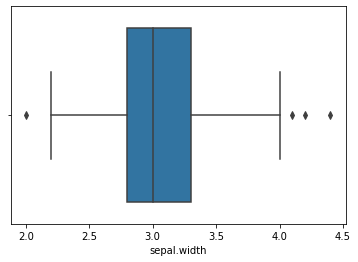

In [51]:
sns.boxplot(df['sepal.width'])

In [52]:
def OutlierRemoval(df,var):
  Q1 = df[var].quantile(0.25)
  Q3 = df[var].quantile(0.75)
  IQR = Q3 - Q1
  high, low = Q3+1.5*IQR, Q1-1.5*IQR
  
  print("Highest allowed in variable:", var, high)
  print("lowest allowed in variable:", var, low)
  
  count = df[(df[var] > high) | (df[var] < low)][var].count()
 
  print('Total outliers in:',var,':',count)
  
  df = df[((df[var] >= low) & (df[var] <= high))]
  return df


In [54]:
print(df.shape)
df = OutlierRemoval(df,'sepal.width')
print(df.shape)


(150, 5)
Highest allowed in variable: sepal.width 4.05
lowest allowed in variable: sepal.width 2.05
Total outliers in: sepal.width : 4
(146, 5)


<AxesSubplot:>

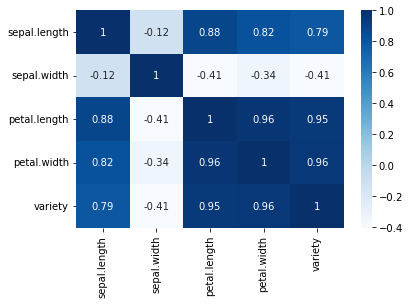

In [55]:
sns.heatmap(df.corr(),annot=True,cmap="Blues")

In [56]:
# split the data into inputs and outputs
X = df.iloc[:, [0,2,3]].values
y = df.iloc[:, 4].values

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size= 0.25, random_state=0)

In [59]:
# importing standard scaler
from sklearn.preprocessing import StandardScaler


In [60]:
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)


In [61]:
from sklearn.naive_bayes import GaussianNB
m1= GaussianNB()

In [62]:
m1.fit(X_train, y_train)

GaussianNB()

In [66]:
y_pred1=m1.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score

In [67]:
print(accuracy_score(y_test,y_pred1))

0.8648648648648649


In [69]:
from sklearn.metrics import confusion_matrix

In [71]:
cm = confusion_matrix(y_test, y_pred1)

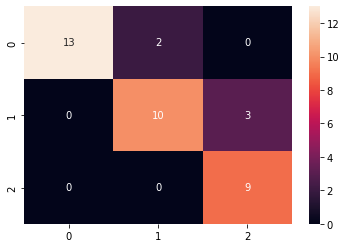

In [72]:
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

In [73]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.83      0.77      0.80        13
           2       0.75      1.00      0.86         9

    accuracy                           0.86        37
   macro avg       0.86      0.88      0.86        37
weighted avg       0.88      0.86      0.87        37

